In [64]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [1]:
import pandas as pd
import os

In [2]:
all_data = list()
for root, b, files in os.walk("./Subway"):
    for file in files:
        file_path = root + "/" + file
        print (file_path)
        all_data.append(pd.read_csv(file_path, encoding='euc-kr'))

./Subway/Subway_201601.csv
./Subway/Subway_201602.csv
./Subway/Subway_201603.csv
./Subway/Subway_201604.csv
./Subway/Subway_201605.csv
./Subway/Subway_201606.csv
./Subway/Subway_201607.csv
./Subway/Subway_201608.csv
./Subway/Subway_201609.csv
./Subway/Subway_201610.csv
./Subway/Subway_201611.csv
./Subway/Subway_201612.csv


In [3]:
# 정리된 1월 ~ 5월까지 데이터프레임 
all_data_1 = list()
for month in all_data[:5]:
    tmp = month.groupby(['날짜', '호선', '역명', '구 분']).agg('sum')
    tmp.reset_index(inplace=True)
    tmp.drop(['호선', '04 ~ 05', '02 ~ 03', '03 ~ 04'], axis=1, inplace=True)
    all_data_1.append(tmp)

In [4]:
df1 = pd.concat(all_data_1)

In [5]:
all_data_2 = list()
for month in all_data[5:-1]:
    all_data_2.append(month[['날짜', '역명', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02']])

In [6]:
all_data[-1]

,역명,날짜,구분,05~06시,06~07시,07~08시,08~09시,09~10시,10~11시,11~12시,...,16~17시,17~18시,18~19시,19~20시,20~21시,21~22시,22~23시,23~24시,00~01시,01~02시
0,서울역(150),2016-12-01,승차,411,552,1792,3429,2737,2430,3161,...,4145,4984,9595,5217,3492,3978,2742,1380,198,0
1,서울역(150),2016-12-01,하차,280,1680,4629,10313,5586,2920,2673,...,2905,3084,3715,2723,1794,1657,1533,761,373,32
2,서울역(150),2016-12-02,승차,434,520,1695,3456,2848,2568,3398,...,5180,6141,10682,6169,4169,4479,4554,1794,443,0
3,서울역(150),2016-12-02,하차,255,1609,4504,10225,5322,3050,2435,...,3692,3545,5575,3389,2141,2076,1928,1074,547,64
4,서울역(150),2016-12-03,승차,543,467,982,2080,3000,3077,4340,...,8023,6418,6575,4904,4742,4683,4654,1697,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,남태령(434),2016-12-29,하차,2,26,189,238,68,64,30,...,46,57,67,78,36,50,39,24,17,0
7374,남태령(434),2016-12-30,승차,18,23,125,165,111,80,61,...,93,162,275,164,41,29,22,10,1,0
7375,남태령(434),2016-12-30,하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
7376,남태령(434),2016-12-31,승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0


In [7]:
month12 = all_data[-1][['날짜', '역명', '구분', '05~06시', '06~07시', '07~08시', '08~09시', '09~10시',
       '10~11시', '11~12시', '12~13시', '13~14시', '14~15시', '15~16시', '16~17시',
       '17~18시', '18~19시', '19~20시', '20~21시', '21~22시', '22~23시', '23~24시',
       '00~01시', '01~02시']]

In [8]:
df2 = pd.concat(all_data_2)

In [9]:
df1.columns = df2.columns.tolist()
month12.columns = df2.columns.tolist()

In [10]:
month12

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-12-01,서울역(150),승차,411,552,1792,3429,2737,2430,3161,...,4145,4984,9595,5217,3492,3978,2742,1380,198,0
1,2016-12-01,서울역(150),하차,280,1680,4629,10313,5586,2920,2673,...,2905,3084,3715,2723,1794,1657,1533,761,373,32
2,2016-12-02,서울역(150),승차,434,520,1695,3456,2848,2568,3398,...,5180,6141,10682,6169,4169,4479,4554,1794,443,0
3,2016-12-02,서울역(150),하차,255,1609,4504,10225,5322,3050,2435,...,3692,3545,5575,3389,2141,2076,1928,1074,547,64
4,2016-12-03,서울역(150),승차,543,467,982,2080,3000,3077,4340,...,8023,6418,6575,4904,4742,4683,4654,1697,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,2016-12-29,남태령(434),하차,2,26,189,238,68,64,30,...,46,57,67,78,36,50,39,24,17,0
7374,2016-12-30,남태령(434),승차,18,23,125,165,111,80,61,...,93,162,275,164,41,29,22,10,1,0
7375,2016-12-30,남태령(434),하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
7376,2016-12-31,남태령(434),승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0


In [11]:
df_all = pd.concat([df1, df2, month12])

In [12]:
df1.head(1)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0


In [13]:
df2.head(1)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-06-01,서울역(150),승차,521,538,2111,3391,2454,2385,2821,...,3764,5060,9536,5169,3393,3820,2440,1355,202,0


In [14]:
df_all.head(5)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
1,2016-01-01,동대문(155),하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
2,2016-01-01,동묘앞(159),승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
3,2016-01-01,동묘앞(159),하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
4,2016-01-01,서울역(150),승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0


In [15]:
df_all.to_csv("Subway_2016.csv", encoding='utf-8-sig')

In [16]:
last_day = df_all.query("날짜 == '2016-12-31' & 역명=='서울역(150)'")

In [17]:
last_day

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
60,2016-12-31,서울역(150),승차,429,453,673,1412,1683,2362,3682,...,5891,5657,4629,3853,2804,3467,3170,1629,444,179
61,2016-12-31,서울역(150),하차,251,1355,1555,1859,2735,2675,2632,...,3960,3947,3259,3016,2611,2840,2216,1399,1724,2069


In [18]:
mask = (last_day.iloc[:,3:].diff(axis=0).iloc[1,] < 0).values

In [19]:
last_day.iloc[:,3:].iloc[:,mask]

,05~06,11~12,12~13,13~14,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24
60,429,3682,3930,4248,4512,5891,5657,4629,3853,2804,3467,3170,1629
61,251,2632,3644,3509,3571,3960,3947,3259,3016,2611,2840,2216,1399


In [20]:
df_all['역명'].unique()

array(['동대문(155)', '동묘앞(159)', '서울역(150)', '시청(151)', '신설동(156)',
       '제기동(157)', '종각(152)', '종로3가(153)', '종로5가(154)', '청량리(지하)(158)',
       '강남(222)', '강변(214)', '건대입구(212)', '교대(223)', '구로디지털단지(232)',
       '구의(213)', '낙성대(227)', '당산(237)', '대림(233)', '도림천(247)',
       '동대문역사문화공원(205)', '뚝섬(210)', '문래(235)', '방배(225)', '봉천(229)',
       '사당(226)', '삼성(219)', '상왕십리(207)', '서울대입구(228)', '서초(224)',
       '선릉(220)', '성수(211)', '시청(201)', '신답(245)', '신당(206)', '신대방(231)',
       '신도림(234)', '신림(230)', '신설동(246)', '신정네거리(249)', '신천(217)',
       '신촌(240)', '아현(242)', '양천구청(248)', '역삼(221)', '영등포구청(236)',
       '왕십리(성동구청)(208)', '용답(244)', '용두(250)', '을지로3가(203)', '을지로4가(204)',
       '을지로입구(202)', '이대(241)', '잠실(216)', '잠실나루(215)', '종합운동장(218)',
       '충정로(243)', '한양대(209)', '합정(238)', '홍대입구(239)', '가락시장(340)',
       '경복궁(317)', '경찰병원(341)', '고속터미널(329)', '교대(330)', '구파발(310)',
       '금호(324)', '남부터미널(331)', '녹번(313)', '대청(337)', '대치(335)',
       '도곡(334)', '독립문(316)', '동대입구(32

In [21]:
kangnam = df_all.query("역명 == '강남(222)'")

In [22]:
kangnam['월'] = kangnam['날짜'].apply(lambda x : x[:7])

C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
kangnam_month = kangnam.groupby(['월']).agg('sum')

In [24]:
graph = kangnam_month.apply(lambda x : sum(x), axis=1)

In [25]:
import matplotlib.pyplot as plt

In [26]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size
print (fig_size)

[16, 9]


In [27]:
import matplotlib.font_manager as fm

In [28]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

1072


In [29]:
[x for x in font_list if x.find("gulim") > 1]

['C:\\Windows\\Fonts\\gulim.ttc', 'C:\\WINDOWS\\Fonts\\gulim.ttc']

In [30]:
font_location = 'c:\\windows\\fonts\\ngulim.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

In [31]:
font_name

'New Gulim'

In [32]:
plt.rc('font', family=font_name)

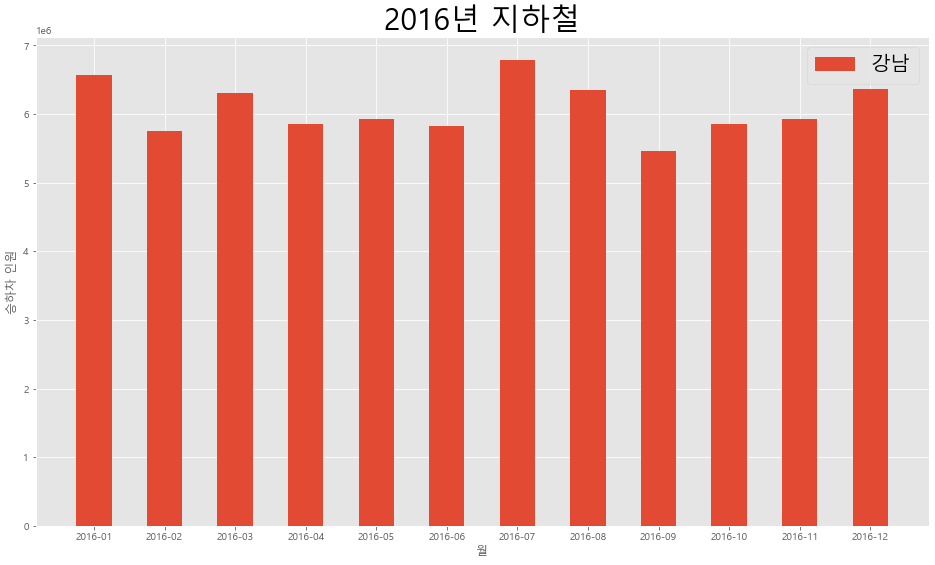

In [65]:
with plt.style.context("ggplot"):
    p1 = plt.bar(graph.index, graph.values, width=0.5)
    plt.title("2016년 지하철", fontsize=30)
    plt.xlabel("월")
    plt.ylabel("승하차 인원")
    plt.legend(p1, ['강남'], fontsize=20)

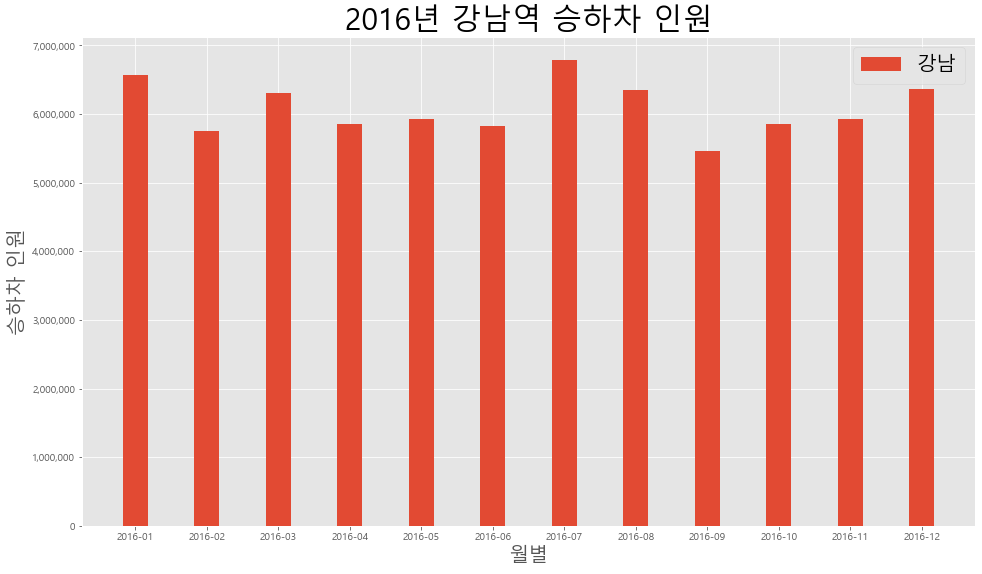

In [66]:
import matplotlib as mpl
with plt.style.context('ggplot'):
    bar_width = 0.35
    fig, ax = plt.subplots(1)
    ax.bar(graph.index, graph.values, width=bar_width)
    ax.set_xlabel('월별', fontsize=20)
    ax.set_ylabel('승하차 인원' , fontsize=20)
    ax.set_title('2016년 강남역 승하차 인원', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend(['강남'],fontsize=20)

In [35]:
kangnam_month_gubun = kangnam.groupby(['월', '구분']).agg('sum')

In [36]:
k_m_gubun = kangnam_month_gubun.apply(lambda x : sum(x), axis=1)

In [37]:
data1 = pd.DataFrame(k_m_gubun)

In [38]:
data1.reset_index(inplace=True)

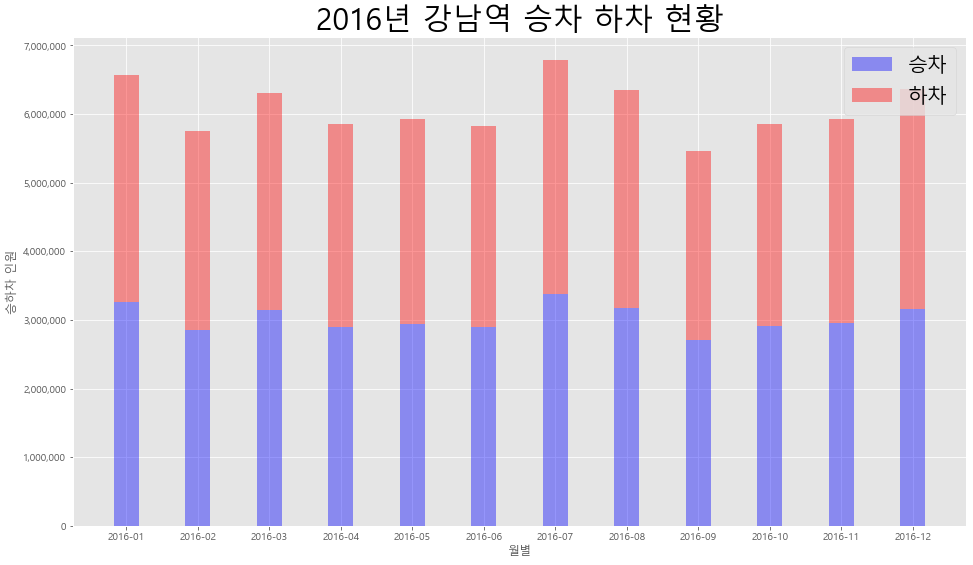

In [67]:
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(data1.query("구분=='승차'")['월'], data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', bottom= data1.query("구분=='승차'")[0],label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=20)

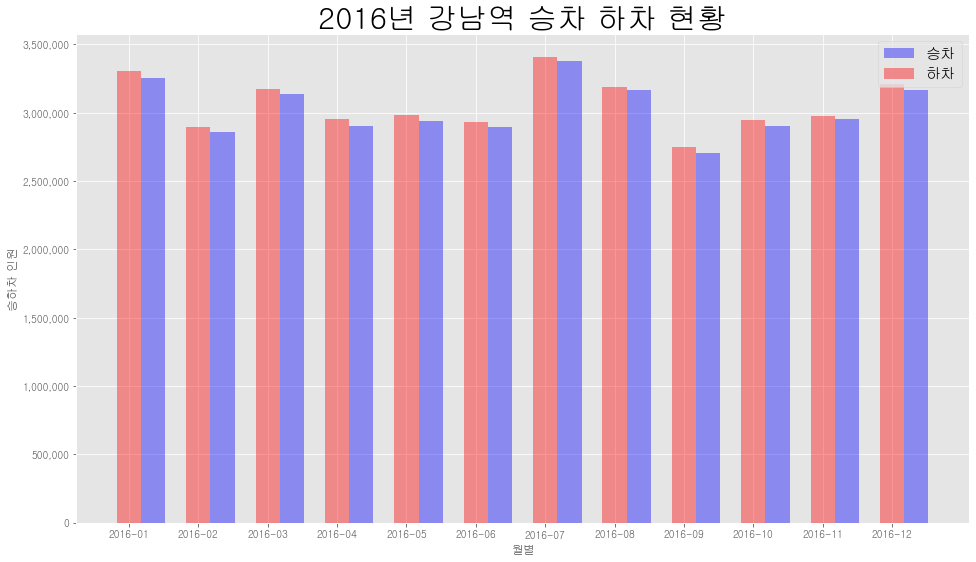

In [40]:
import numpy as np
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(np.arange(12) + bar_width, data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=15)

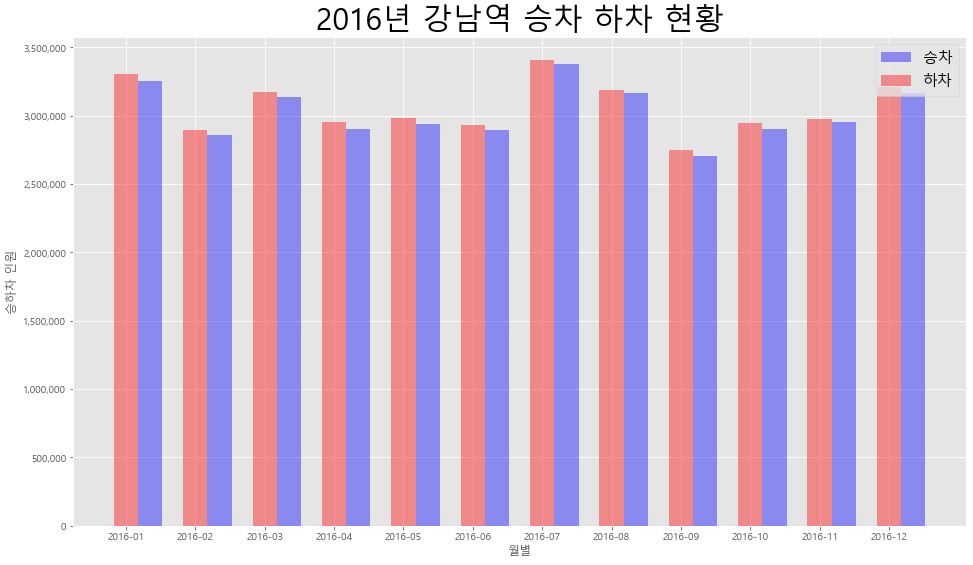

In [68]:
import numpy as np
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(np.arange(12) + bar_width, data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=15)

In [42]:
tmp = data1[data1['구분'] =='승차']

In [69]:
tmp['test'] = data1[data1['구분'] =='하차'][0].values

C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
tmp.drop(['구분'], axis=1, inplace=True)

KeyError: '구분'

In [45]:
from datetime import datetime, date, time

In [46]:
datetime.strptime('2016-01', '%Y-%m')

datetime.datetime(2016, 1, 1, 0, 0)

In [47]:
tmp.columns = [['월', '승차', '하차']]

In [48]:
tmp.set_index('월', inplace=True)

In [49]:
tmp

,승차,하차
월,,
"(2016-01,)",3257354,3308383
"(2016-02,)",2857897,2897333
"(2016-03,)",3137048,3171109
"(2016-04,)",2901249,2955286
"(2016-05,)",2937838,2981989
"(2016-06,)",2893814,2932549
"(2016-07,)",3379605,3409181
"(2016-08,)",3166476,3189492
"(2016-09,)",2709059,2751835


In [50]:
tmp.index.tolist()

[('2016-01',),
 ('2016-02',),
 ('2016-03',),
 ('2016-04',),
 ('2016-05',),
 ('2016-06',),
 ('2016-07',),
 ('2016-08',),
 ('2016-09',),
 ('2016-10',),
 ('2016-11',),
 ('2016-12',)]

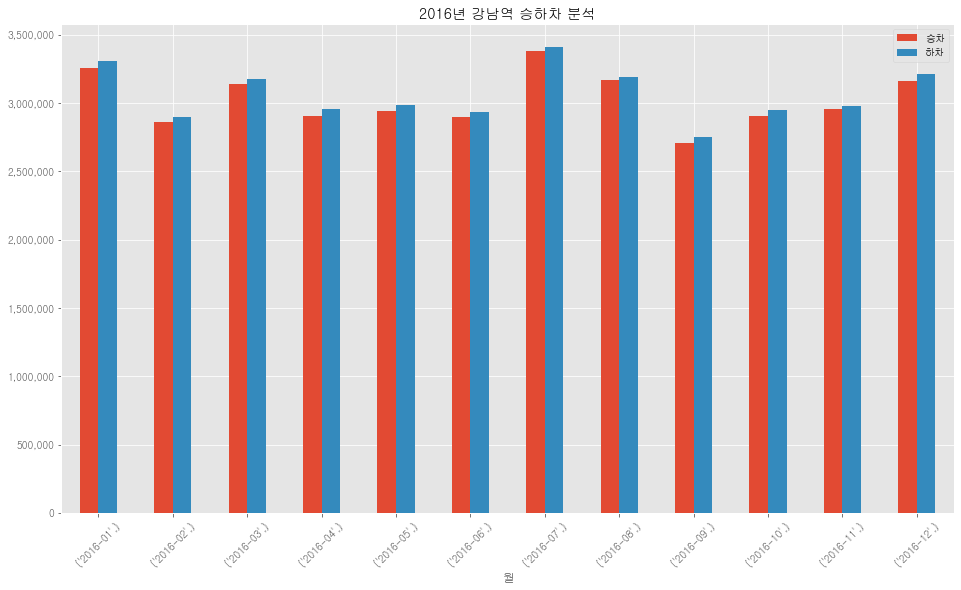

In [51]:
with plt.style.context('ggplot'):
    ax = tmp.plot(kind='bar', stacked=False, title="지하철")
    plt.xticks(range(12),tmp.index.tolist())
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=45)
    plt.title('2016년 강남역 승하차 분석')
    plt.legend(['승차', '하차'])

In [52]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


<AxesSubplot:title={'center':'The title of my graph'}>

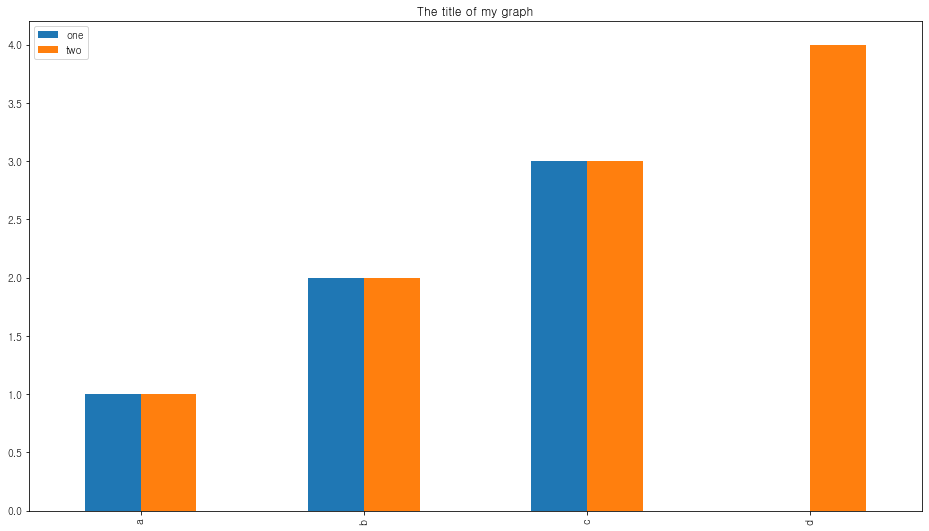

In [53]:
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=False,title="The title of my graph")

# 역명으로

In [54]:
subway = df_all.groupby(['역명']).agg('sum')

In [55]:
subway_trans = subway.apply(lambda x : sum(x), axis=1)

In [56]:
subway_trans_1 = pd.DataFrame(subway_trans, columns=['counts'])

In [57]:
subway_trans_1

,counts
역명,
가락시장(340),6592770
강남(222),72989920
강변(214),36523673
건대입구(212),34947918
경복궁(317),19243308
...,...
합정(238),24807004
혜화(420),32442475
홍대입구(239),57959028


In [58]:
rank = subway_trans_1.sort_values(by=['counts'], ascending=False).iloc[:30,:]

In [59]:
rank

,counts
역명,
강남(222),72989920
잠실(216),59959378
홍대입구(239),57959028
신림(230),52797959
구로디지털단지(232),46290426
신도림(234),45882099
서울역(150),43057432
고속터미널(329),42586946
삼성(219),41763727


In [60]:
subway_trans_1.nlargest(15, 'counts')

,counts
역명,
강남(222),72989920
잠실(216),59959378
홍대입구(239),57959028
신림(230),52797959
구로디지털단지(232),46290426
신도림(234),45882099
서울역(150),43057432
고속터미널(329),42586946
삼성(219),41763727


In [61]:
subway_trans_1.nsmallest(15, 'counts')

,counts
역명,
도림천(247),804083
남태령(434),990047
지축(309),995325
신답(245),1049878
용두(250),1706585
용답(244),1885032
동작(431),2043352
학여울(336),2344556
신설동(246),2859380


In [62]:
82856 *365

30242440

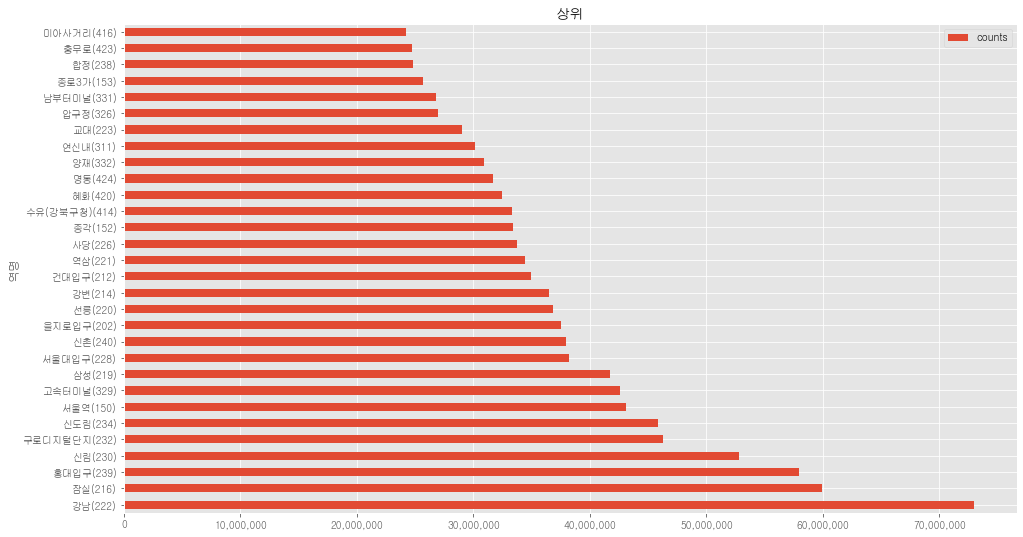

In [63]:
with plt.style.context('ggplot'):
    ax = rank.plot(kind='barh', grid=True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title("상위")
    plt.show()